<a href="https://colab.research.google.com/github/gpsri/WakeWordDetection_Alexa_Skardin_Trail/blob/main/skardin_rma_xmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Wakeword Training From Audio data and create the both Tensorflow module and Tensorflow-Lite module for RMA

In [18]:
! pip install tensorflow
! pip install numpy
! pip install pandas
! pip install pickle5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


imports

In [27]:
#Import the library
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pickle5 as pickle
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.metrics import confusion_matrix, classification_report



plot confusion matrix

In [28]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()



##### Loading saved csv ##############

In [21]:

with open('sri_audio_data_20221130_1.csv', "rb") as dt:
  df = pickle.load(dt)

# pd.__version__

####### Making our data training-ready
X = df["feature"].values
X = np.concatenate(X, axis=0).reshape(len(X), 40)

y = np.array(df["class_label"].tolist())
y = to_categorical(y)

####### train test split ############
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


#Training

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               5248      
                                                                 
 activation_6 (Activation)   (None, 128)               0         
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 activation_7 (Activation)   (None, 128)               0         
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 2)                

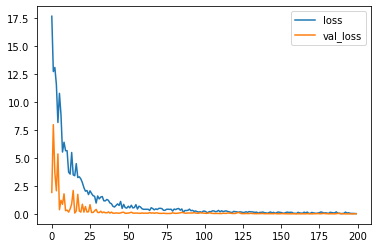

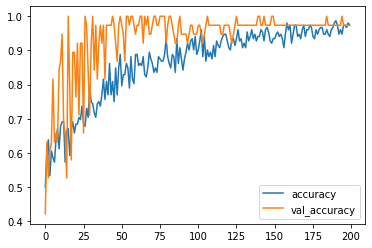

In [31]:
model = Sequential([
    Dense(128, input_shape=X_train[0].shape),
    Activation('relu'),
    Dropout(0.2),
    Dense(128),
    Activation('relu'),
    Dropout(0.2),
    Dense(2, activation='softmax')
])

print(model.summary())

model.compile(
    loss="categorical_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)


print("Model Score: \n")
# history = model.fit(X_train, y_train, epochs=500)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200)
score = model.evaluate(X_test, y_test)
print(score)

metrics = history.history
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label ='val_loss')
plt.legend(['loss','val_loss'])
plt.show()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label ='val_accuracy')
plt.legend(['accuracy','val_accuracy'])
plt.show()

#Save model

In [30]:
model.save("saved_model/Sri_WWD_20221128_200epochs_Fiona.h5")

#Evaluating our model with confusion Matrix

Model Classification Report: 

2/2 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        14

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Confusion matrix, without normalization
[[24  0]
 [ 0 14]]


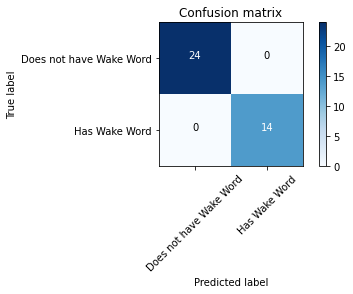

In [29]:
#### Evaluating our model ###########
print("Model Classification Report: \n")
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print(classification_report(np.argmax(y_test, axis=1), y_pred))
plot_confusion_matrix(cm, classes=["Does not have Wake Word", "Has Wake Word"])